In [12]:

# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [13]:
df_CA = df[df['job_country'] == 'Canada']

In [14]:
df_skills = df_CA.explode('job_skills')

df_skills[['job_title', 'job_skills']]

,job_title,job_skills
50,Sr ML Engineer - Research & NLP (Remote),python
50,Sr ML Engineer - Research & NLP (Remote),sql
50,Sr ML Engineer - Research & NLP (Remote),pytorch
50,Sr ML Engineer - Research & NLP (Remote),pandas
59,Data Engineer with Dremio Experience,sql
...,...,...
785511,Data Engineer,spark
785511,Data Engineer,airflow
785511,Data Engineer,kafka
785643,Analyste,word


In [15]:
# Group by job_skills and job_title_short and count the number of occurrences
df_skills_count = df_skills.groupby(['job_skills', 'job_title_short']).size()

# Name the count column as count
df_skills_count = df_skills_count.reset_index(name='skill_count')

# Sort the values by skill_count in descending order
df_skills_count.sort_values(by='skill_count', ascending=False, inplace=True)

df_skills_count

,job_skills,job_title_short,skill_count
1215,sql,Data Engineer,3794
949,python,Data Engineer,3567
108,azure,Data Engineer,2217
98,aws,Data Engineer,2030
1171,spark,Data Engineer,1948
...,...,...,...
749,no-sql,Cloud Engineer,1
748,no-sql,Business Analyst,1
671,mattermost,Senior Data Analyst,1
1439,webex,Data Scientist,1


In [16]:
job_titles = df_skills_count['job_title_short'].unique().tolist()

job_titles = sorted(job_titles[:3])

job_titles

['Data Analyst', 'Data Engineer', 'Senior Data Engineer']

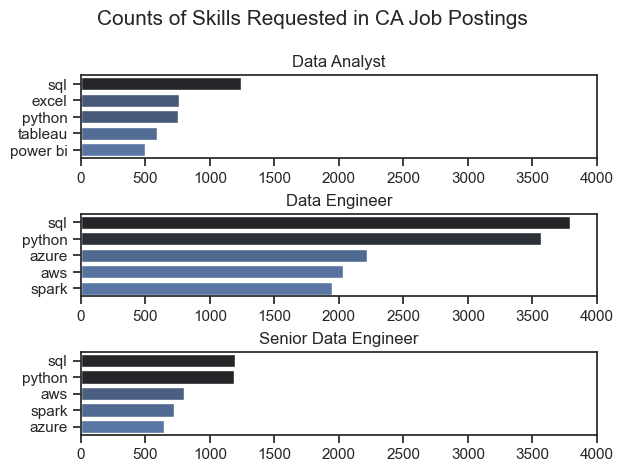

In [17]:
fig, ax = plt.subplots(len(job_titles), 1)

sns.set_theme(style='ticks')

for i, job_title in enumerate(job_titles):
    df_plot = df_skills_count[df_skills_count['job_title_short'] == job_title].head(5)[::-1]
    sns.barplot(data=df_plot, x='skill_count', y='job_skills', ax=ax[i], hue='skill_count', palette='dark:b_r')
    ax[i].set_title(job_title)
    ax[i].invert_yaxis()
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')
    ax[i].get_legend().remove()
    ax[i].set_xlim(0, 4000) # make the scales the same

fig.suptitle('Counts of Skills Requested in CA Job Postings', fontsize=15)
fig.tight_layout(h_pad=0.5) # fix the overlap
plt.show()

In [18]:
# Use original df to get the count of job titles
df_job_title_count = df_CA['job_title_short'].value_counts().reset_index(name='jobs_total')

df_job_title_count

,job_title_short,jobs_total
0,Data Engineer,5828
1,Data Analyst,2365
2,Data Scientist,1825
3,Senior Data Engineer,1776
4,Software Engineer,1254
5,Business Analyst,1109
6,Senior Data Scientist,589
7,Machine Learning Engineer,566
8,Senior Data Analyst,435
9,Cloud Engineer,282


In [19]:
df_skills_perc = pd.merge(df_skills_count, df_job_title_count, on='job_title_short', how='left')

df_skills_perc['skill_percent'] = (df_skills_perc['skill_count'] / df_skills_perc['jobs_total']) * 100

df_skills_perc

,job_skills,job_title_short,skill_count,jobs_total,skill_percent
0,sql,Data Engineer,3794,5828,65.099520
1,python,Data Engineer,3567,5828,61.204530
2,azure,Data Engineer,2217,5828,38.040494
3,aws,Data Engineer,2030,5828,34.831846
4,spark,Data Engineer,1948,5828,33.424846
...,...,...,...,...,...
1480,no-sql,Cloud Engineer,1,282,0.354610
1481,no-sql,Business Analyst,1,1109,0.090171
1482,mattermost,Senior Data Analyst,1,435,0.229885
1483,webex,Data Scientist,1,1825,0.054795


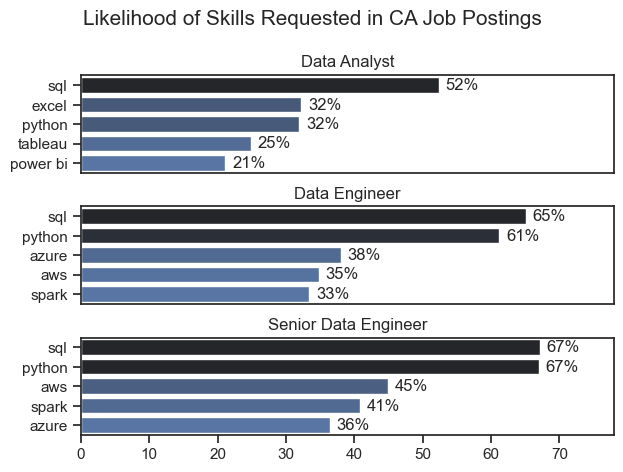

In [20]:
fig, ax = plt.subplots(len(job_titles), 1)


for i, job_title in enumerate(job_titles):
    df_plot = df_skills_perc[df_skills_perc['job_title_short'] == job_title].head(5)
    sns.barplot(data=df_plot, x='skill_percent', y='job_skills', ax=ax[i], hue='skill_count', palette='dark:b_r')
    ax[i].set_title(job_title)
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')
    ax[i].get_legend().remove()
    ax[i].set_xlim(0, 78)
    # remove the x-axis tick labels for better readability
    if i != len(job_titles) - 1:
        ax[i].set_xticks([])

    # label the percentage on the bars
    for n, v in enumerate(df_plot['skill_percent']):
        ax[i].text(v + 1, n, f'{v:.0f}%', va='center')

fig.suptitle('Likelihood of Skills Requested in CA Job Postings', fontsize=15)
fig.tight_layout(h_pad=.8)
plt.show()